## Задание по 1 и 2 занятиям
## Математический анализ

https://docs.sympy.org/latest/tutorial/intro.html

In [1]:
from sympy import *

### Функции пользователя
#### Задание 1
Описать функцию $f(x,n)=x(x+1)...(x+n-1)(x+n)$, $n>0$, вычислить  $f(6,7)$, $f(x,4)$, $f(y + z,x)$.      

In [ ]:
x_s, y, z = symbols('x y z')

def f(x, n):
  ans = 1
  tup_to_check = (int, float)
  if isinstance(n , tup_to_check):
    for i in range(n + 1):
      ans *= (x + i)
    return ans
  else:
    return f"({x})({(x + 1)})...({x + n - 1})({x + n})"

print("f(6; 7) = ")
display(f(6, 7))
print("\nf(x, 4) = ")
display(f(x_s, 4))
print("\nf(y + z, x) = ")
display(f(y + z, x_s))



#### Задание 2
Описать функцию $right\_ratio(f, x, delta\_x)$, вычисляющую правое разностное отношение функции $f$ в точке $x$ при $\Delta x$, т.е. $\frac{f(x+\Delta x)-f(x)}{\Delta x}$.

Аргумент $ delta\_x$ по умолчанию равен 1.

Вычислить правое разностное отношение $\sin$ в точке $\frac{\pi}{4}$ со значением $\Delta x$ равным  $\frac{\pi}{6}$

и правое разностное отношение $e^x$ при $x=3$ со значением $\Delta x$  по умолчанию. Для вычисления $e^x$ воспользоваться функцией Sympy $\exp(x)$.

In [ ]:
def right_ratio(func, x, delt_x = 1):
  return (func(x + delt_x) - func(x))/delt_x

f1 = right_ratio(sin, pi/4, pi/6)
f2 = right_ratio(exp, 3)
print(f"[1].Правое разностоное отношение функции sin(x) в точке pi/4 при смещении = pi/6:\n")
display(simplify(f1))
print(f"{chr(8776)}")
display(f1.evalf(7))
print("\n[2].Правое разностное отношение функции экспоненты в точке 3 при смещение = 1:\n")
display(collect(f2, E))
print(f"{chr(8776)}")
display(f2.evalf(7))

#### Задание 3
Опиcать функцию $square\_roots$, возвращающую корни квадратного уравнения $a x^2 + bx + c = 0$  с вещественными аргументами $a\neq 0$, b, c и  необязательным параметром $is\_real$, по умолчанию равным $True$. Функция возвращает список корней уравнения. Если корни комплексные, а $is\_real=True$, то функция возвращает пустой список. Если корень один, то в списке корней он тоже должен быть один.

Решить уравнения в вещественных числах:

а) $3x^2+8x+4=0$,

б) $x^2-4x+4=0$

в) $2x^2+x+1=0$

Уравнение в) решить отдельно в комплексных числах.

Для красивого представления комплексных чисел можно воспользоваться функцией display.

Если элементы списка нужно выводить в столбик, можно воспользоваться display(\*имя_списка) (\* в данном случае служебный символ)

In [ ]:
lst_params = [[3, 8, 4], [1, -4, 4], [2, 1, 1]]

x = symbols('x')

def square_roots(lst_params, is_real = True):
  a, b, c = lst_params
  discr = b**2 - (4 * a * c)
  discr_sq = sqrt(discr)
  set_roots = set()

  #Можно не делать ветвление на случаи так как sqrt() библиотеки sympy считате корни отрицательных чисел
  if (discr < 0 and is_real == False):
    set_roots.add((-b + discr_sq)/ (2 * a))
    set_roots.add((-b - discr_sq) / (2 * a))
  elif (discr < 0 and is_real == True):
    print("Уравнение не имеет решений в вещественных числах")
  elif (discr >= 0):
    set_roots.add((-b + discr_sq)/ (2 * a))
    set_roots.add((-b - discr_sq)/ (2 * a))

  return Matrix(list(set_roots)).T

def GetEq(lst_params):
  return Matrix(lst_params).T * Matrix([x**2, x, 1])

def ShowResult(lst_params, num, isR = True):
  print(f"\n[{num + 1}]. Уравенение:")
  display(GetEq(lst_params))
  if isR == True:
    print("\nКорни в вещественных числах:\n")
  else:
    print("\nКорни в комплексных числах:\n")
  display(square_roots(lst_params, isR))

for i in range(len(lst_params)):
  ShowResult(lst_params[i], i)

ShowResult(lst_params[2], 3, False)

#### Задание 4
Описать функцию $less\_c(my\_list,c)$, возвращающую первый попавшийся элемент списка $my\_list$, меньший $c$, и его номер в списке. Если таких элементов нет, возвращается ($None, None$).

Вызвать функцию $less\_c(my\_list,c)$ со списком $my\_list = [3, -2, 8]$ и $c = - 4$, затем с тем же списком, но $c = 1$.

С помощью этой функции найти четное натуральное число $n$ до 100 (включительно), такое что $\sin n <\frac12$, построив предварительно список $list\_sin$ синусов четных натуральных чисел (строить список с помощью for и range).

In [ ]:
def less_c(lst, num):
  for i in range(len(lst)):
    if lst[i] < num:
      return (lst[i], i)
  return (None, None)

#Функция с похожим функционалом, но находящая наибольший из элементов списка меньших чем C и его индекс в изначальном списке
def less_c_improved(lst, num):
  tmp_lst = sorted([(lst[i], i) for i in range(len(lst)) if lst[i] < num], key = lambda x: x[0])[::-1]
  if len(tmp_lst) > 0:
    return tmp_lst[0]
  return (None, None)

lst_to_check = [3, -2, 8]
lst_sin = [sin(i) for i in range(2, 101, 2)]
lst_check = [int(i) for i in range(2, 101, 2)]

print("Вызов функции less_c для списка my_list и параметра C = -4:\n")
display(less_c(lst_to_check, -4))
print("\nВызов функции less_c для списка my_list и параметра C = 1:\n")
display(less_c(lst_to_check, 1))
print("\nЧётное натуральное число N <= 100, такое что sin(n) < 1/2:\n")
display(lst_check[less_c(lst_sin, 0.5)[1]])
print("\nЧисло N2, удволетворяющее всем свойствам числа N, но найденное через функцию less_c_improved:\n")
display(lst_check[less_c_improved(lst_sin, 0.5)[1]])


def less_c_improved(lst, num):
  tmp_lst = sorted([(lst[i], i) for i in range(len(lst)) if lst[i] < num], key = lambda x: x[0])[::-1]
  if len(tmp_lst) > 0:
    return tmp_lst[0]
  return (None, None)

### Графики в Sympy


#### Задание 5
Построить на отрезке $[-2\pi,2\pi]$ график $tg(x)$ зеленым цветом, а график $ctg(x)$ красным, задать предел по вертикальной оси (-5, 5).

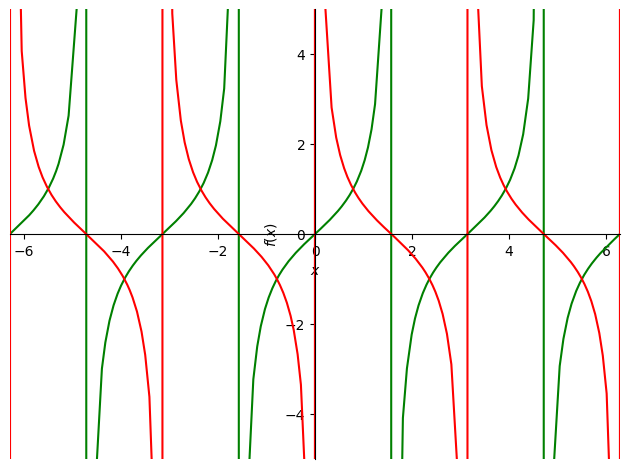

In [10]:
%matplotlib inline
y_lim = [-5, 5]
x_lim = [-2 * pi, 2 * pi]

plt_1 = plot(tan(x), xlim = x_lim, ylim = y_lim, line_color = "green",exclude = [pi/2],  show = False)
plt_2 = plot(cot(x), xlim = x_lim, ylim = y_lim, line_color = "red", exclude = [pi/2], show = False)
plt_1.append(plt_2[0])

plt_1.show()

#### Задание 6
Построить графики логарифма по основанию 2, 10, $1/2$ и натурального логарифма в одной плоскости, каждый график отдельным цветом ('red', 'green', 'black', 'pink'). Отобразить название графика "Логарифмы по основанию 2, 10, $1/2$ и $e$", подписать горизонтальную ось $\phi$, вертикальную ось $\log_a\phi$.
Включить легенду, в ней все функции подписать своими формулами, например, натуральный логарифм $\ln \phi$, десятичный $\lg \phi$.

#### Указание.
Можно составить подходящий словарь, list или tuple и использовать его в plot.
Вначале можно построить только координатную плоскость с надписью графика и подписями осей, а также legend=True, а затем в цикле добавлять с помощью append графики логарифмов разных цветов.

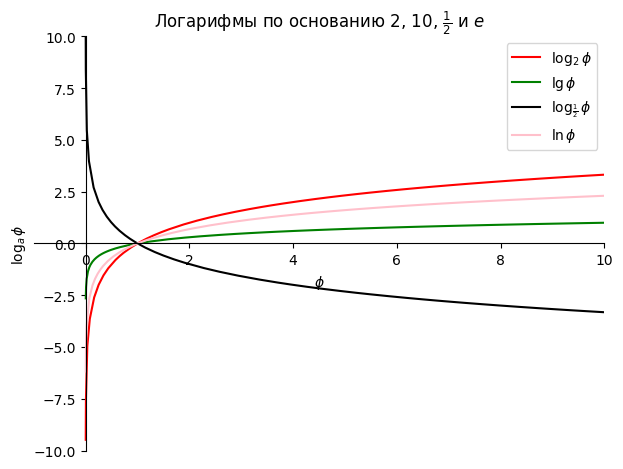

In [11]:
y_lim = (-10, 10)
x_lim = (-1, 10)
plt_m = plot(xlim = x_lim, ylim = y_lim, ylabel=r"$\log_{a}\phi$",
             legend = True, show = False, xlabel=r"$\phi$",
            title=r"Логарифмы по основанию 2, 10, $\frac{1}{2}$ и $e$")

dct_func = {log(x, 2): ("red", r"$\log_{2}\phi$"),
            log(x, 10): ("green", r"$\lg\phi$"),
            log(x, 0.5): ("black", r"$\log_{\frac{1}{2}}\phi$"),
            log(x, E) : ("pink", r"$\ln \phi$")}

def add_func_to_plot(cur_func, cur_color, cur_label):
  plt_m.append(plot(cur_func, xlim = x_lim, ylim = y_lim, show = False, line_color = cur_color, label = cur_label)[0])

for func in dct_func.keys():
  add_func_to_plot(func, dct_func[func][0], dct_func[func][1])

plt_m.show()

#### Задание 7
Изобразить на графике гиперболу, заданную своим каноническим уравнением
$$
\frac{x^2}{a^2}-\frac{y^2}{b^2}=1,
$$
при $a=3$, $b=5$. Масштаб по осям одинаковый, рекомендуемый интервал (-10, 10).

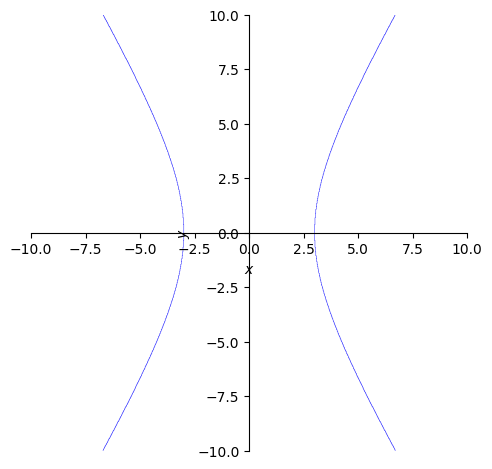

In [12]:
a, b = symbols('a b')
can_func = x**2/a**2 - y**2/b**2

def getPlot(canon_func, canon_r, a_param, b_param):
  dct_subs = {a : a_param, b : b_param}
  subs_func = canon_func.subs(dct_subs)
  plot_implicit(Eq(subs_func, canon_r), (x, -10, 10), (y, -10, 10),
                xlabel = r"$x$", ylabel = r"$y$", aspect_ratio = (1, 1))

getPlot(can_func, 1, 3, 5)

### Индивидуальное задание (файл Ind_tasks_...)
Построить график параметрически заданной функции с соответствующими уравнениям подписями к осям.
В легенде отразить уравнения функции в строчку.

Вариант №134

$f\left(x\right) = \sin\left(5x^{2} + 9x + 8\right) - \cos\left(-2x^{2} + 3x + 4\right)$

$X = \left[-1, -3 + 5\pi, 7 - \pi\right]$

Функция:


sin(5*x**2 + 9*x + 8) - cos(-2*x**3 + 3*x + 4)


График функции:


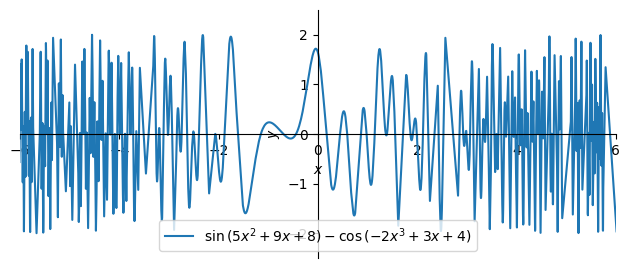


Значение функции в точке -1 = 0.23
Значение функции в точке -3 + 5*pi = 0.88
Значение функции в точке 7 - pi = -1.1



[0.23, 0.88, -1.1]

In [13]:
x = symbols('x')
func = sin(5 * x**2 + 9 * x + 8) - cos(-2 * x ** 3 + 3 * x + 4)
X = [-1, -3 + 5 * pi, 7 - pi]

print("Функция:")
display(func)
print("\nГрафик функции:")
plot(func, xlim = (-6, 6), ylim = (-2.5, 2.5), aspect_ratio = (1, 1), xlabel=r"$x$", ylabel=r"$y$",
     legend = True)
print()

def getValue(funcS, x_dot):
  return funcS.subs(x, x_dot).evalf(2)

ans = []
for val in X:
  print(f"Значение функции в точке {val} = {getValue(func, val)}")
  ans.append(getValue(func, val))

print()
display(ans)